In [1]:
import pandas as pd
import numpy as np

In [2]:
salesData = pd.read_excel("dataFiles/Sales_Data.xlsx")
salesData

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


In [3]:
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [4]:
numCol = []
catCol = []

for col in salesData.columns:
    if salesData[col].dtype == 'O':
        catCol.append(col)
    else:
        numCol.append(col)

In [5]:
print("List of categorical columns:", catCol)
print("List of numerical columns:", numCol)

List of categorical columns: ['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']
List of numerical columns: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'MSRP']


In [6]:
salesData[numCol].describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098951,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042548,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [7]:
salesData[catCol].describe().T

,count,unique,top,freq
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
PHONE,2747,88,(91) 555 94 44,259
ADDRESSLINE1,2747,89,"C/ Moralzarzal, 86",259
CITY,2747,71,Madrid,304
POSTALCODE,2747,73,28034,259
COUNTRY,2747,19,USA,928
CONTACTLASTNAME,2747,76,Freyre,259


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

ORDERNUMBER


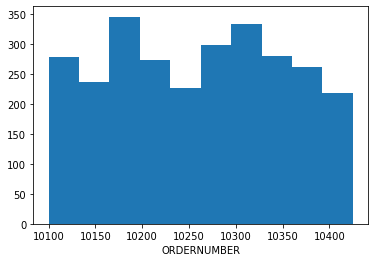

QUANTITYORDERED


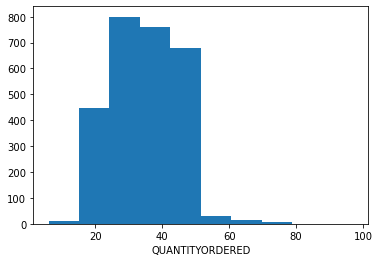

PRICEEACH


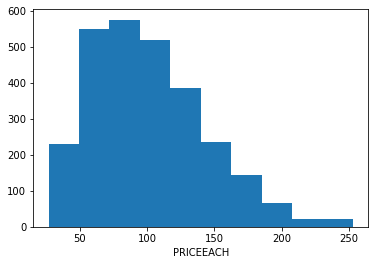

ORDERLINENUMBER


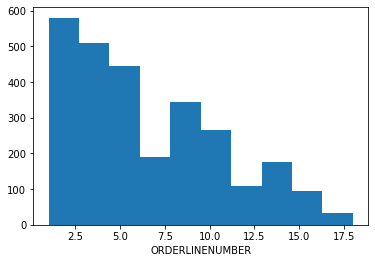

SALES


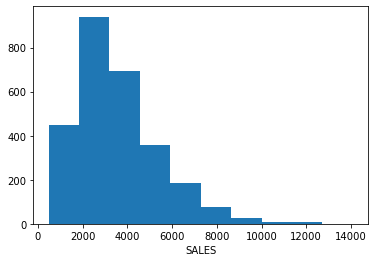

ORDERDATE


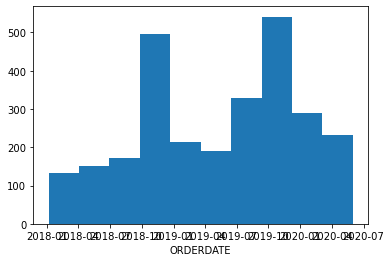

DAYS_SINCE_LASTORDER


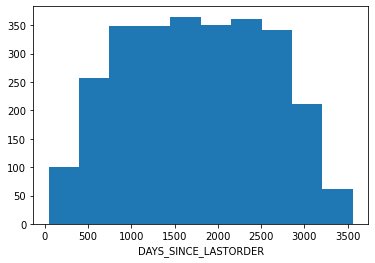

MSRP


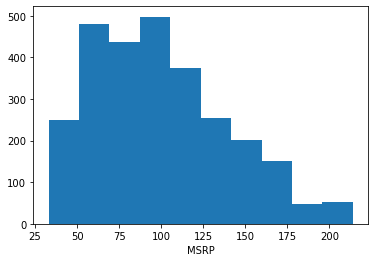

In [9]:
# printing histogram using pyplot
for nCol in numCol:
    print(nCol)
    plt.hist(salesData[nCol])
    plt.xlabel(nCol)
    plt.plot()
    plt.show()

ORDERNUMBER


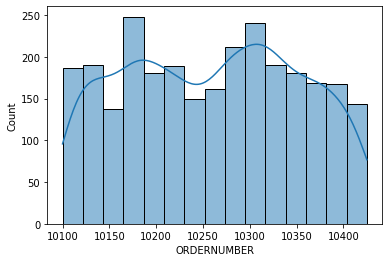

QUANTITYORDERED


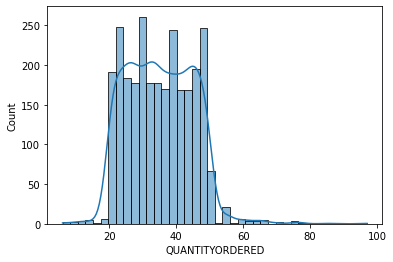

PRICEEACH


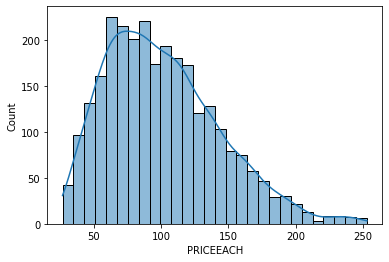

ORDERLINENUMBER


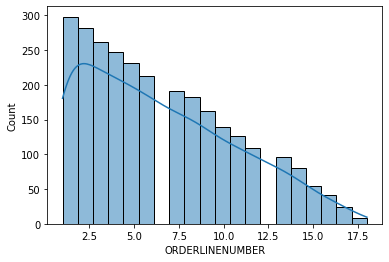

SALES


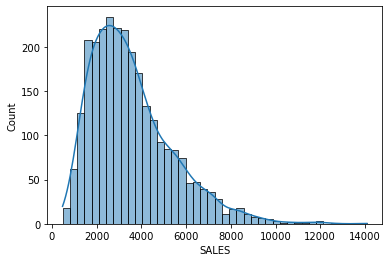

ORDERDATE


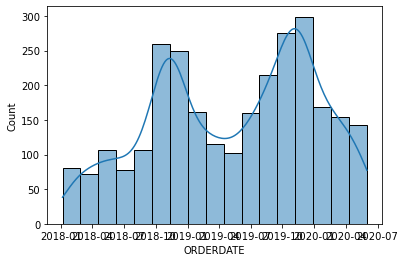

DAYS_SINCE_LASTORDER


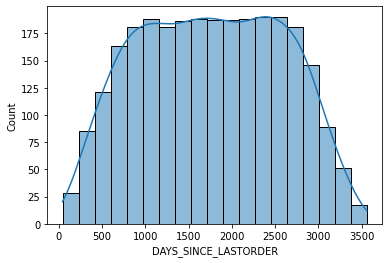

MSRP


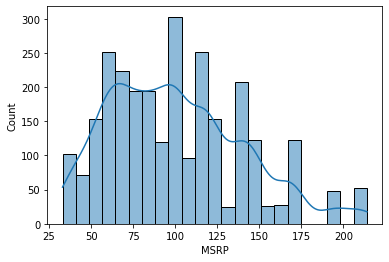

In [10]:
# printing histogram using seaborn
for nCol in numCol:
    print(nCol)
    sns.histplot(salesData[nCol], kde=True)
    plt.xlabel(nCol)
    plt.plot()
    plt.show()

In [11]:
numCol.remove("ORDERDATE")

ORDERNUMBER


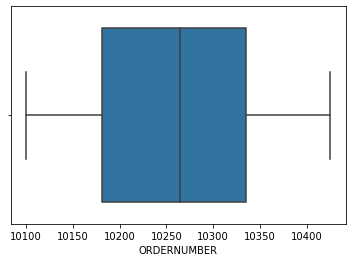

QUANTITYORDERED


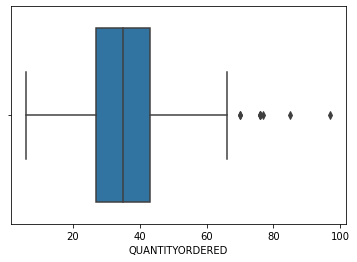

PRICEEACH


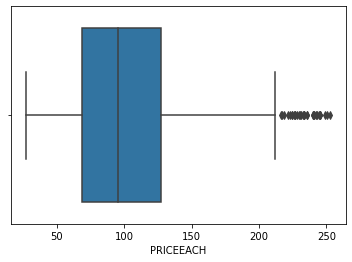

ORDERLINENUMBER


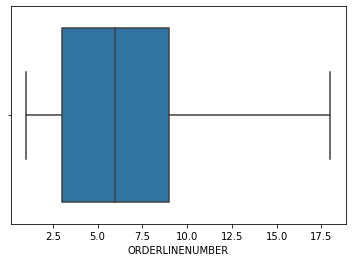

SALES


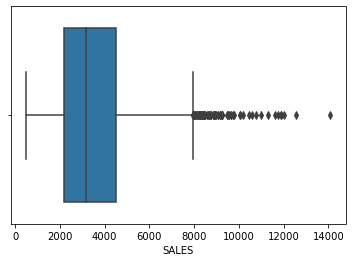

DAYS_SINCE_LASTORDER


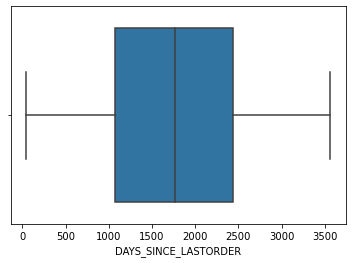

MSRP


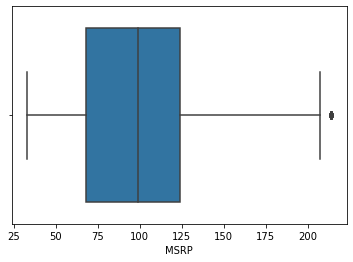

In [12]:
# printing boxplot using seaborn
for nCol in numCol:
    print(nCol)
    sns.boxplot(x = salesData[nCol])
    plt.xlabel(nCol)
    plt.plot()
    plt.show()

STATUS


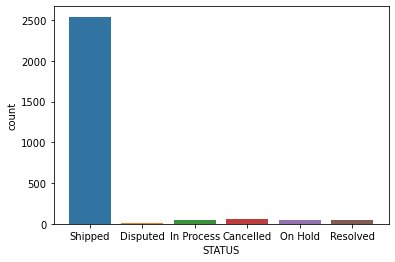

PRODUCTLINE


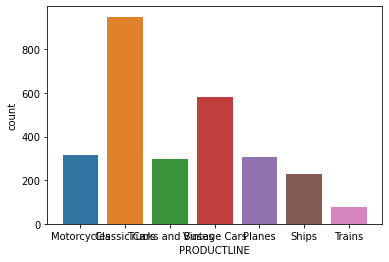

PRODUCTCODE


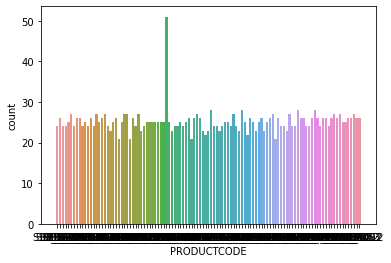

CUSTOMERNAME


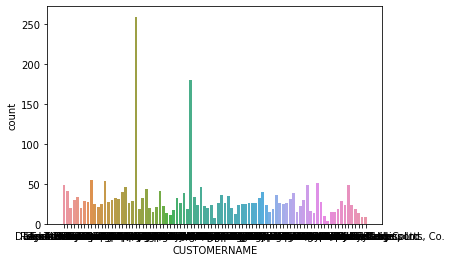

PHONE


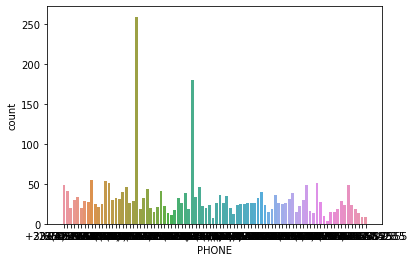

ADDRESSLINE1


/Users/hkothawade/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hkothawade/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0, flags=flags)


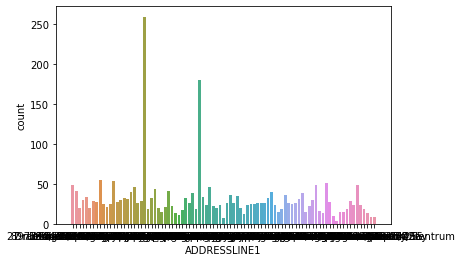

CITY


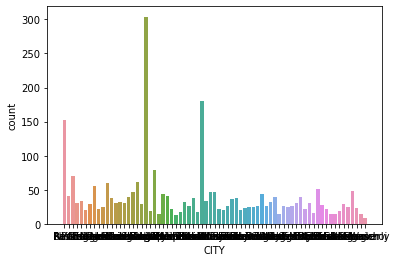

POSTALCODE


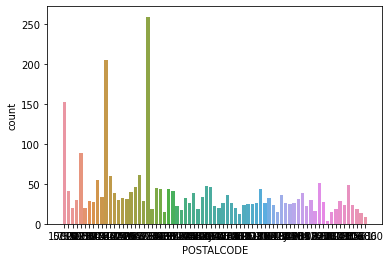

COUNTRY


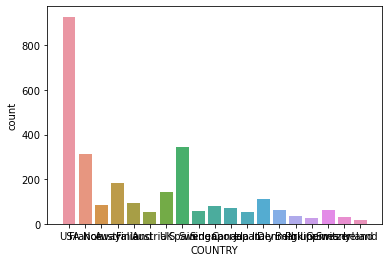

CONTACTLASTNAME


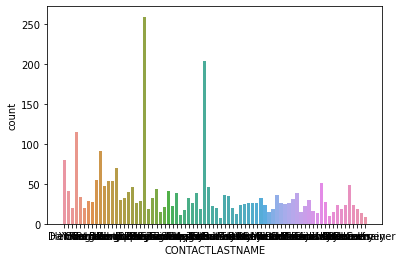

CONTACTFIRSTNAME


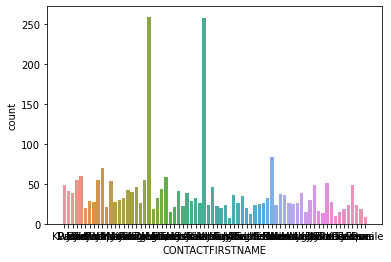

DEALSIZE


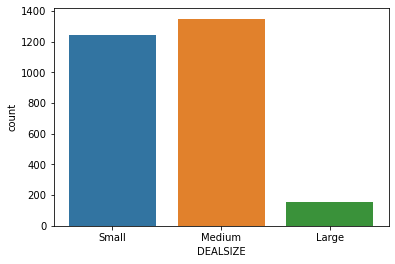

In [13]:
# printing countplot using seaborn
for cCol in catCol:
    print(cCol)
    sns.countplot(x = salesData[cCol])
    plt.xlabel(cCol)
    plt.plot()
    plt.show()

STATUS


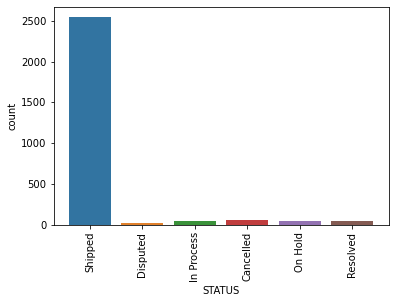

PRODUCTLINE


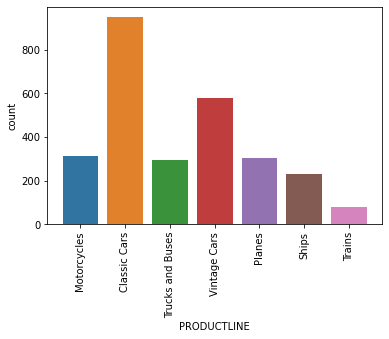

PRODUCTCODE


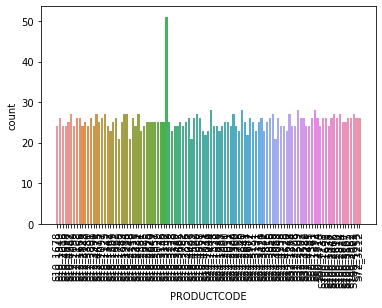

CUSTOMERNAME


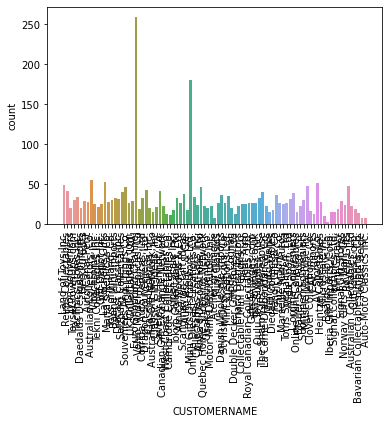

PHONE


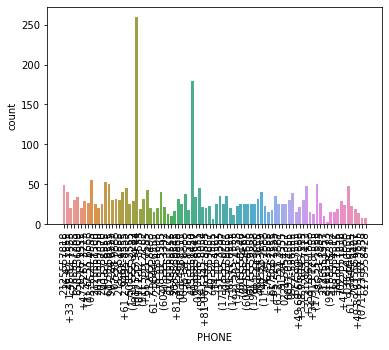

ADDRESSLINE1


/Users/hkothawade/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hkothawade/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0, flags=flags)


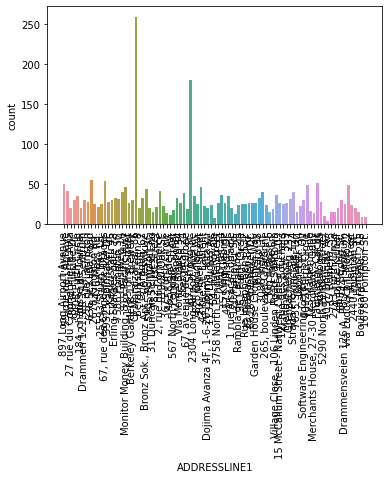

CITY


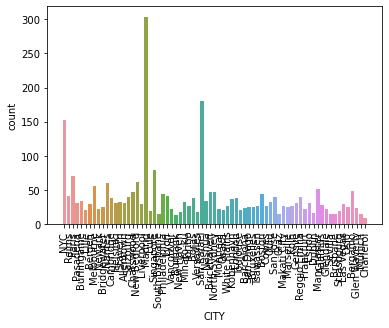

POSTALCODE


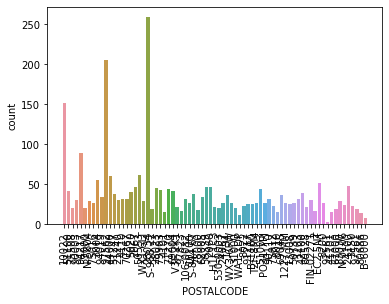

COUNTRY


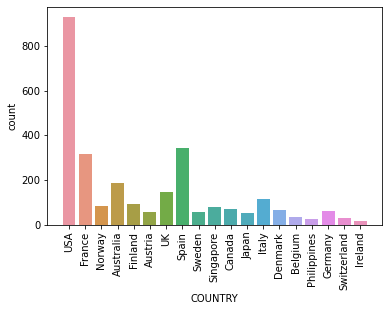

CONTACTLASTNAME


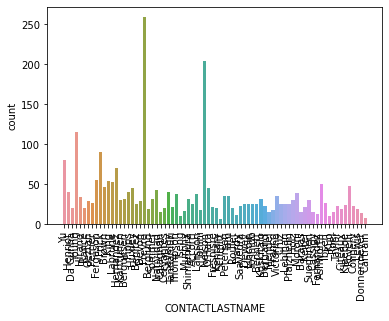

CONTACTFIRSTNAME


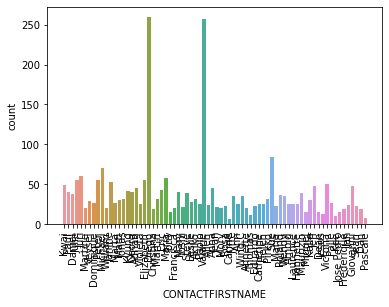

DEALSIZE


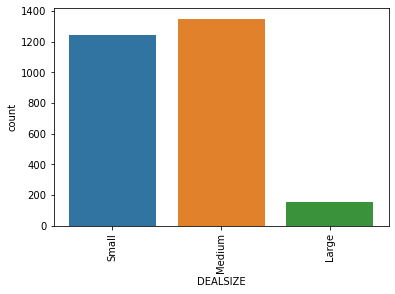

In [14]:
# printing countplot using seaborn (xticks adjusted)
for cCol in catCol:
    print(cCol)
    sns.countplot(x = salesData[cCol])
    plt.xlabel(cCol)
    plt.xticks(rotation=90)
    plt.plot()
    plt.show()